Missing values:
 Closure Reason    786
Match Length        0
dtype: int64
Closure Reasons by Mean Match Length:
                                       Closure Reason  \
0                            Successful match closure   
1                                    Child: Graduated   
2              Child/Family: Lost contact with agency   
3                 Volunteer: Lost contact with agency   
4           Volunteer: Lost contact with child/family   
5           Child/Family: Lost contact with volunteer   
6                Volunteer: Moved out of service area   
7             Child/Family: Moved out of service area   
8                      Child/Family: Time constraints   
9                     Child: Family structure changed   
10                                       COVID impact   
11               Volunteer: Moved within service area   
12                               Child: Lost interest   
13                         Volunteer: Time constraint   
14          Volunteer: Lost conta

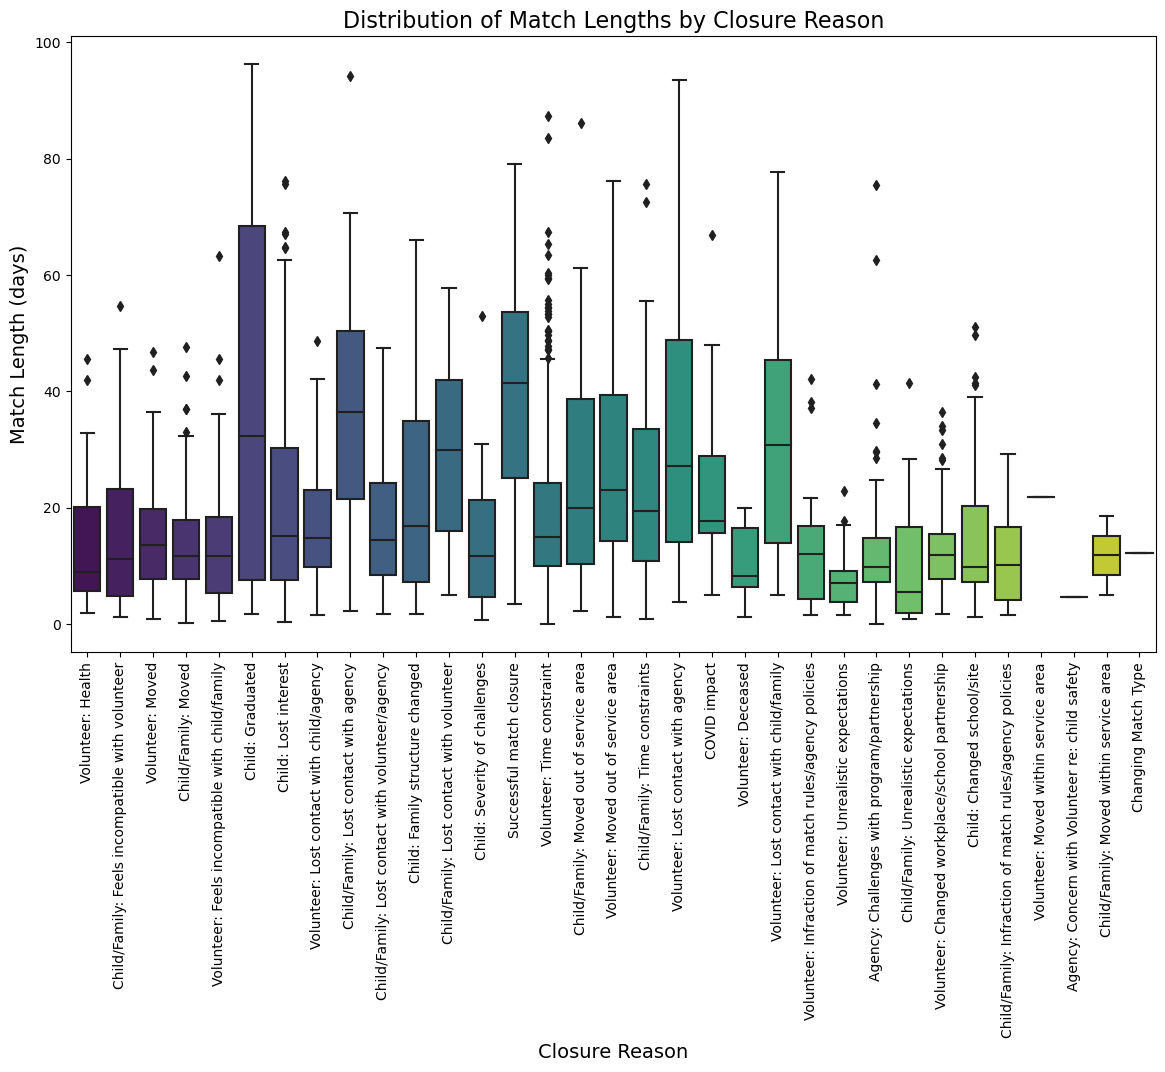

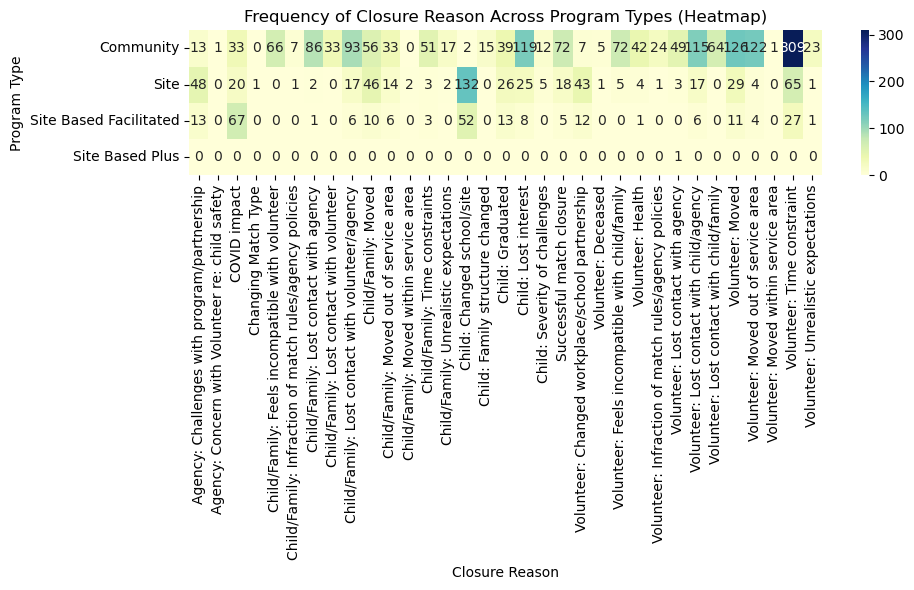

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('novice.csv')
missing_values = df[['Closure Reason', 'Match Length']].isnull().sum()
print("Missing values:\n", missing_values)
df_clean = df.dropna(subset=['Closure Reason', 'Match Length'])

closure_reason_stats = df_clean.groupby('Closure Reason')['Match Length'].agg(['mean', 'median', 'count'])
closure_reason_stats_sorted = closure_reason_stats.sort_values(by='mean', ascending=False)

closure_reason_stats_sorted = closure_reason_stats_sorted.rename(columns={
    'mean': 'Mean Match Length (days)',
    'median': 'Median Match Length (days)',
    'count': 'Number of Matches'
})

closure_reason_stats_sorted = closure_reason_stats_sorted.reset_index()

print("Closure Reasons by Mean Match Length:")
print(closure_reason_stats_sorted)
closure_reason_stats_sorted.to_csv('closure_reason_stats.csv', index=False) #Saves as a csv file
print("Table saved as 'closure_reason_stats.csv'.") 
print("Closure Reasons by Mean Match Length:")
print(closure_reason_stats_sorted)

#Visualizes
plt.figure(figsize=(14, 8))
sns.boxplot(x='Closure Reason', y='Match Length', data=df_clean, palette='viridis')
plt.title('Distribution of Match Lengths by Closure Reason', fontsize=16)
plt.xlabel('Closure Reason', fontsize=14)
plt.ylabel('Match Length (days)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

